<a href="https://colab.research.google.com/github/ShreyaBage/Data-Science-Projects/blob/main/Neural_Network_Type_Classification__(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Neural Network Type Classification***

Using TensorFlow and Keras to load and preprocess the Fashion MNIST dataset. This is a common practice before training a neural network on the data. The code you provided does the following:

Imports the Fashion MNIST dataset from tensorflow.keras.datasets.
Loads the training and testing data along with their corresponding labels.
Normalizes the pixel values of the images to be in the range [0, 1] by dividing each pixel value by 255.0.
This normalization step is essential for training neural networks, as it helps stabilize and speed up the training process. Neural networks generally perform better when input data is centered around zero and has a small standard deviation.

After this preprocessing, you can proceed with building and training your neural network using the normalized data. If you have any specific questions or if you need further assistance with your code, feel free to ask!

***What is a MNIST dataset***

The MNIST dataset is a widely used dataset in the field of machine learning and computer vision. It has several qualities that make it suitable for various purposes, particularly for training and testing models, especially in the context of digit recognition. Here are some key qualities of the MNIST dataset:

*Image Size:* All images in the MNIST dataset are grayscale and have a fixed size of 28x28 pixels. The small size allows for relatively quick training of models, making it a good starting point for experimentation.

*Digit Samples*: MNIST consists of handwritten digits (0 through 9), making it a classification task with ten classes. Each image represents a single digit, and the goal is to train a model to correctly classify the digit in each image.

*Large Dataset*: MNIST is relatively large for a simple dataset, with 60,000 training images and 10,000 testing images. This provides enough data to train models effectively without being excessively large, making it accessible for experimentation on personal machines.

*Standardized Task*: The dataset provides a standardized and widely recognized task for benchmarking and comparing different machine learning models. Many researchers and practitioners use MNIST as a starting point to evaluate and showcase their algorithms.

*Challenging Aspects*: While MNIST is relatively simple compared to more complex datasets, it still poses challenges for certain types of models. The variations in handwriting styles and the simplicity of the images make it a good introductory dataset for testing basic classification algorithms.

*Readily Available*: The MNIST dataset is easily accessible and can be loaded directly using popular machine learning libraries like TensorFlow and PyTorch. This availability makes it a convenient choice for educational purposes and quick experimentation.

It's worth noting that while MNIST has been a benchmark dataset for many years, more complex datasets have been introduced to address the limitations of MNIST and provide a greater challenge for modern machine learning models. Examples include CIFAR-10, CIFAR-100, and ImageNet for image classification tasks.

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

# Load the Fashion MNIST dataset
(X_train_fashion, y_train_fashion), (X_test_fashion, y_test_fashion) = fashion_mnist.load_data()

# Normalize pixel values to be between 0 and 1
X_train_fashion = X_train_fashion / 255.0
X_test_fashion = X_test_fashion / 255.0

Exception ignored in: <function _xla_gc_callback at 0x7f139e02ad40>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 101, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


4422102/4422102 [==============================] - 0s 0us/step


 Setting up a TensorFlow environment for building and training a neural network using the Keras API.

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [ ]:
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


***Scaling Data***
This is a preprocessing step when working with image data, including in the context of neural network training.

Here, X_train and X_test are assumed to be your training and testing datasets, respectively. By dividing the pixel values by 255.0, you're scaling the pixel values to the range [0, 1]. This normalization is beneficial for training neural networks because it ensures that the input data is on a similar scale, which can lead to faster convergence during training.

The rationale behind dividing by 255.0 is that pixel values in typical images are in the range of [0, 255], where 0 represents black and 255 represents white in grayscale images. By dividing by 255.0, you're transforming these pixel values to the range [0, 1], which is a common practice for normalization.

In [ ]:
# Normalize pixel values to be between 0 and 1
X_train, X_test = X_train / 255.0, X_test / 255.0

***Formation of Neural Network***

This layer flattens the 2D array of 28x28 pixels into a 1D array of 784 pixels. It serves as the input layer, transforming the input images into a format that can be processed by the subsequent dense layers.

a fully connected (dense) layer with 128 units and ReLU activation. Each unit in this layer is connected to every unit in the previous layer. The ReLU activation function introduces non-linearity to the model.

Dropout is a regularization technique used to reduce overfitting. It randomly drops a fraction of the neurons during training, helping prevent the model from relying too heavily on specific neurons.

This is the output layer with 10 units, corresponding to the 10 possible digits (assuming this is for a digit classification task). The softmax activation function is used to convert the model's raw output into probabilities for each class, making it suitable for multi-class classification.

In [ ]:
# Build a simple neural network model
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Flatten the 28x28 images into a 1D array
    layers.Dense(128, activation='relu'),  # Fully connected layer with 128 units and ReLU activation
    layers.Dropout(0.2),                    # Dropout layer to reduce overfitting
    layers.Dense(10, activation='softmax')  # Output layer with 10 units (for 10 digits) and softmax activation
])

The Adam optimizer is a popular optimization algorithm used for training neural networks. It adapts the learning rates of individual parameters during training, making it effective for a wide range of tasks.

This is the loss function used to measure how well the model performs during training. For classification problems with integer labels (like the digits 0 through 9 in MNIST), sparse_categorical_crossentropy is a suitable choice. It calculates the crossentropy loss between the true labels and the predicted probabilities.

During training, you want to monitor the accuracy of your model. The accuracy metric indicates the percentage of correctly classified samples. This is a common metric for classification tasks.

After compiling the model, you can proceed with training it on your data using the fit method. For example:


In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


Training Loss and Accuracy:

The training loss decreases, indicating that the model is learning from the training data.
The training accuracy is increasing, showing that the model is improving its ability to correctly classify training samples.
Validation Loss and Accuracy:

The validation loss is also decreasing, suggesting that the model is generalizing well to unseen data.
The validation accuracy is increasing, indicating that the model is performing well on the validation set.
Consistent Improvement:

Across epochs, both training and validation metrics are improving, which is a positive sign.
Training Time:

The training time for each epoch is reasonable, indicating that the model is training efficiently.

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 11s 5ms/step - loss: 0.2989 - accuracy: 0.9125 - val_loss: 0.1428 - val_accuracy: 0.9589
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1443 - accuracy: 0.9571 - val_loss: 0.1036 - val_accuracy: 0.9686
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1085 - accuracy: 0.9683 - val_loss: 0.0915 - val_accuracy: 0.9727
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0882 - accuracy: 0.9735 - val_loss: 0.0837 - val_accuracy: 0.9749
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0746 - accuracy: 0.9768 - val_loss: 0.0769 - val_accuracy: 0.9762


In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 1s 2ms/step - loss: 0.0769 - accuracy: 0.9762
Test accuracy: 0.9761999845504761


This is a useful visualization to understand how well your model is learning from the training data and how well it generalizes to unseen validation data. The history object is likely obtained from the fit method when you trained your model.

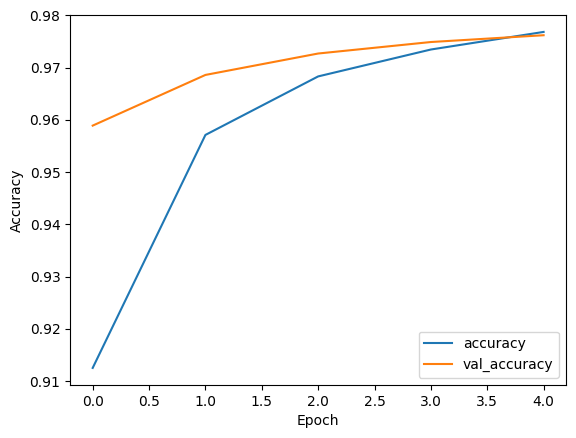

In [ ]:
# Plot the training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

***Step by Step Code Explaination***


history.history['accuracy']: This retrieves the training accuracy for each epoch from the history object.

history.history['val_accuracy']: This retrieves the validation accuracy for each epoch from the history object.

plt.plot(...): This plots the training and validation accuracy on the same graph.

plt.xlabel('Epoch'): Sets the x-axis label to 'Epoch'.

plt.ylabel('Accuracy'): Sets the y-axis label to 'Accuracy'.

plt.legend(loc='lower right'): Adds a legend to the plot, indicating which line corresponds to training accuracy and which one corresponds to validation accuracy. The loc='lower right' parameter places the legend in the lower-right corner of the plot.

plt.show(): Finally, this displays the plot.

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming you have already loaded and preprocessed the Fashion MNIST data (X_train_fashion, y_train_fashion, X_test_fashion, y_test_fashion)

# Split the data into training and testing sets
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(
    X_train_fashion, y_train_fashion, test_size=0.2, random_state=42
)

The provided code aims to perform binary classification on the Fashion MNIST dataset using a neural network. The dataset is loaded and preprocessed, with pixel values normalized to a range between 0 and 1. Multi-class labels are then converted to binary labels, distinguishing between class 0 and all other classes. The data is split into training and testing sets using the train_test_split function from scikit-learn. A simple neural network model is defined using the Keras Sequential API, consisting of a flattening layer, a dense hidden layer with ReLU activation, and an output layer with sigmoid activation for binary classification. The model is compiled with the Adam optimizer, binary crossentropy loss, and accuracy as the evaluation metric. Training is performed for 10 epochs, and a 10% validation split is used to monitor the model's performance. Finally, the trained model is evaluated on the test set, and the test accuracy is printed. The code demonstrates a standard workflow for binary classification tasks, showcasing data preprocessing, model construction, training, and evaluation steps.








In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split

# Load the Fashion MNIST dataset
(X_train_fashion, y_train_fashion), (X_test_fashion, y_test_fashion) = tf.keras.datasets.fashion_mnist.load_data()

# Preprocess the data
X_train_fashion, X_test_fashion = X_train_fashion / 255.0, X_test_fashion / 255.0

# Convert labels to binary (0 for class 0, 1 for all other classes)
y_train_binary = (y_train_fashion == 0).astype(int)
y_test_binary = (y_test_fashion == 0).astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_train_fashion, y_train_binary, test_size=0.2, random_state=42
)

# Build a simple binary classification model
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, validation_split=0.1)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc}")

Epoch 1/10
1350/1350 [==============================] - 10s 6ms/step - loss: 0.1133 - accuracy: 0.9551 - val_loss: 0.0979 - val_accuracy: 0.9606
Epoch 2/10
1350/1350 [==============================] - 6s 5ms/step - loss: 0.0960 - accuracy: 0.9613 - val_loss: 0.0924 - val_accuracy: 0.9598
Epoch 3/10
1350/1350 [==============================] - 8s 6ms/step - loss: 0.0888 - accuracy: 0.9631 - val_loss: 0.0820 - val_accuracy: 0.9640
Epoch 4/10
1350/1350 [==============================] - 6s 4ms/step - loss: 0.0836 - accuracy: 0.9650 - val_loss: 0.0793 - val_accuracy: 0.9633
Epoch 5/10
1350/1350 [==============================] - 8s 6ms/step - loss: 0.0806 - accuracy: 0.9666 - val_loss: 0.0792 - val_accuracy: 0.9644
Epoch 6/10
1350/1350 [==============================] - 6s 4ms/step - loss: 0.0767 - accuracy: 0.9681 - val_loss: 0.0764 - val_accuracy: 0.9673
Epoch 7/10
1350/1350 [==============================] - 9s 7ms/step - loss: 0.0741 - accuracy: 0.9691 - val_loss: 0.0763 - val_accuracy

The provided code is designed to create a neural network for multiclass classification using the Fashion MNIST dataset. Initially, the dataset is loaded and preprocessed by normalizing the pixel values to a range between 0 and 1. Subsequently, the class labels are converted to one-hot encoding using the to_categorical function from Keras, essential for multiclass classification. The data is then split into training and testing sets with an 80-20 ratio. The neural network model is constructed using the Keras Sequential API, comprising a flattening layer to preprocess the input, a dense hidden layer with rectified linear unit (ReLU) activation, and an output layer with softmax activation to generate class probabilities. The model is compiled with the Adam optimizer, categorical crossentropy loss, and accuracy as the evaluation metric. The training phase involves fitting the model to the training data for 10 epochs, with a 10% validation split for monitoring performance. Finally, the model is evaluated on the test set, and the test accuracy is printed. This code encapsulates a standard procedure for building and training a multiclass classification model, providing insights into model performance on unseen data.








In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Load the Fashion MNIST dataset
(X_train_fashion, y_train_fashion), (X_test_fashion, y_test_fashion) = tf.keras.datasets.fashion_mnist.load_data()

# Preprocess the data
X_train_fashion, X_test_fashion = X_train_fashion / 255.0, X_test_fashion / 255.0

# Convert labels to one-hot encoding
y_train_categorical = to_categorical(y_train_fashion)
y_test_categorical = to_categorical(y_test_fashion)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_train_fashion, y_train_categorical, test_size=0.2, random_state=42
)

# Build a simple multiclass classification model
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, validation_split=0.1)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc}")

Epoch 1/10
1350/1350 [==============================] - 13s 9ms/step - loss: 0.5321 - accuracy: 0.8170 - val_loss: 0.4326 - val_accuracy: 0.8413
Epoch 2/10
1350/1350 [==============================] - 8s 6ms/step - loss: 0.3954 - accuracy: 0.8591 - val_loss: 0.4026 - val_accuracy: 0.8523
Epoch 3/10
1350/1350 [==============================] - 7s 5ms/step - loss: 0.3559 - accuracy: 0.8700 - val_loss: 0.3560 - val_accuracy: 0.8673
Epoch 4/10
1350/1350 [==============================] - 7s 5ms/step - loss: 0.3263 - accuracy: 0.8809 - val_loss: 0.3492 - val_accuracy: 0.8698
Epoch 5/10
1350/1350 [==============================] - 7s 5ms/step - loss: 0.3083 - accuracy: 0.8888 - val_loss: 0.3613 - val_accuracy: 0.8681
Epoch 6/10
1350/1350 [==============================] - 6s 5ms/step - loss: 0.2926 - accuracy: 0.8926 - val_loss: 0.3461 - val_accuracy: 0.8758
Epoch 7/10
1350/1350 [==============================] - 7s 5ms/step - loss: 0.2788 - accuracy: 0.8978 - val_loss: 0.3235 - val_accuracy

375/375 [==============================] - 3s 7ms/step


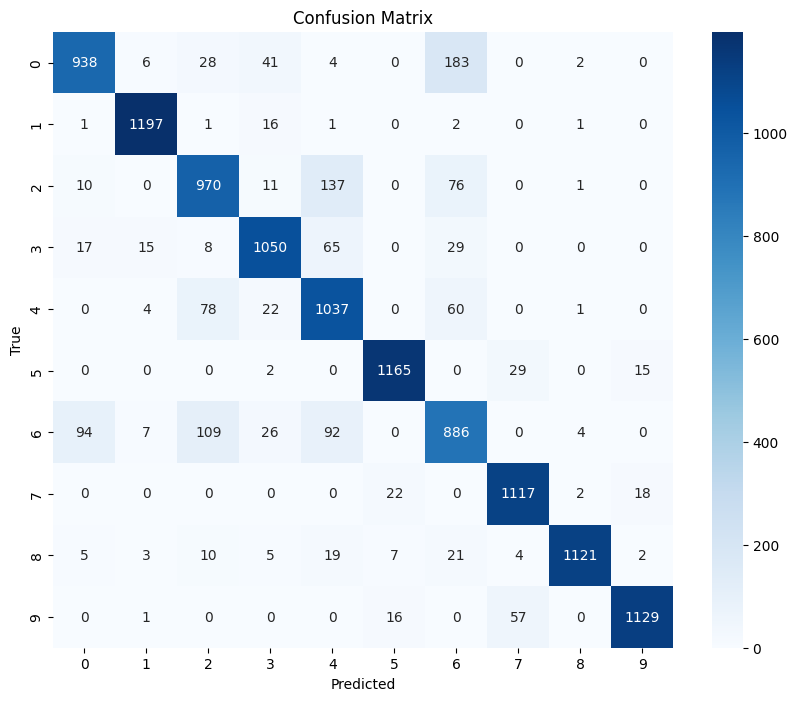

              precision    recall  f1-score   support

           0       0.88      0.78      0.83      1202
           1       0.97      0.98      0.98      1219
           2       0.81      0.80      0.81      1205
           3       0.90      0.89      0.89      1184
           4       0.77      0.86      0.81      1202
           5       0.96      0.96      0.96      1211
           6       0.70      0.73      0.72      1218
           7       0.93      0.96      0.94      1159
           8       0.99      0.94      0.96      1197
           9       0.97      0.94      0.95      1203

    accuracy                           0.88     12000
   macro avg       0.89      0.88      0.89     12000
weighted avg       0.89      0.88      0.88     12000



In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Predictions on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Confusion Matrix
conf_mat = confusion_matrix(y_true_classes, y_pred_classes)

# Plot Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print(classification_report(y_true_classes, y_pred_classes))

***Conclusion***

The provided output represents the classification report for a multiclass classification model. Each row corresponds to a different class, and the columns provide various evaluation metrics for each class, including precision, recall, and F1-score. Here's an interpretation of the key metrics:

Precision: Measures the accuracy of the positive predictions. For instance, for class 0, it indicates that 88% of the instances predicted as class 0 were indeed class 0.

Recall: Measures the ability of the model to capture all the relevant instances of a particular class. For example, for class 1, it indicates that 98% of the actual instances of class 1 were correctly identified.

F1-score: Represents the harmonic mean of precision and recall. It provides a balanced measure of a model's performance. For instance, for class 8, the F1-score is 96%, reflecting a balance between precision and recall.

Support: Denotes the number of actual occurrences of each class in the test set.

Accuracy: Represents the overall accuracy of the model across all classes, indicating the percentage of correctly classified instances.

Macro Avg: Represents the average of precision, recall, and F1-score across all classes. It treats all classes equally.

Weighted Avg: Similar to macro avg, but it considers the number of instances in each class, giving more weight to classes with more instances.

In this specific case, the model exhibits an overall accuracy of 88% on a dataset of 12,000 instances. The macro avg and weighted avg scores, both around 88%, suggest a reasonably balanced performance across different classes. However, it's important to assess the metrics for individual classes to understand specific strengths and weaknesses of the model in classifying different categories. Adjustments to the model or its training process can be considered based on these insights.






